In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=['math_score'],axis = 1)
y = df['math_score']

In [10]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)



In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 40)


In [20]:
X_train.shape, X_test.shape

((700, 7), (300, 7))

In [21]:
X_train = preprocessor.fit_transform(X_train)

In [22]:
X_train

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.15380934, -0.45816122],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.70726402,  1.26467642],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19083387,  0.4032576 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -1.80809677, -1.91594691],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.91202442, -0.78947615],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.5673812 , -0.39189823]])

In [26]:
X_test = preprocessor.fit_transform(X_test)

In [27]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # to train the model

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2699
- Mean Absolute Error: 4.1699
- R2 Score: 0.8770
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4704
- Mean Absolute Error: 4.4283
- R2 Score: 0.8746


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5156
- Mean Absolute Error: 5.0960
- R2 Score: 0.8120
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.9315
- Mean Absolute Error: 5.6110
- R2 Score: 0.7986


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2501
- Mean Absolute Error: 4.1516
- R2 Score: 0.8779
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5001
- Mean Absolute Error: 4.4740
- R2 Score: 0.8732


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 6.0034
- Mean Absolute Error: 4.8057
- R2 Score: 0.8404
-----------------------

In [32]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
0,Linear Regression,0.874573
2,Ridge,0.873210
7,CatBoosting Regressor,0.855462
5,Random Forest Regressor,0.838831
8,AdaBoost Regressor,0.822904
6,XGBRegressor,0.812390
3,K-Neighbors Regressor,0.807450
1,Lasso,0.798625
4,Decision Tree,0.734927


In [33]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.46


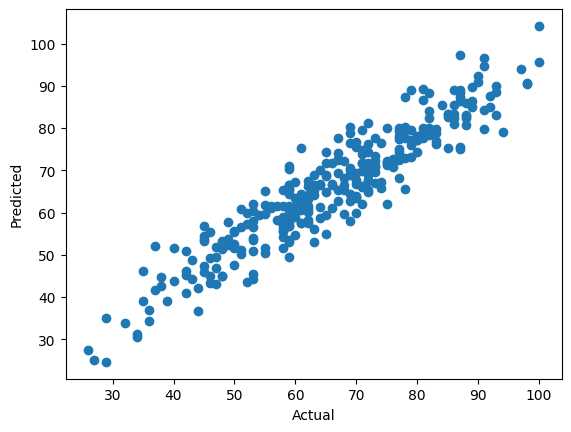

In [34]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math_score'>

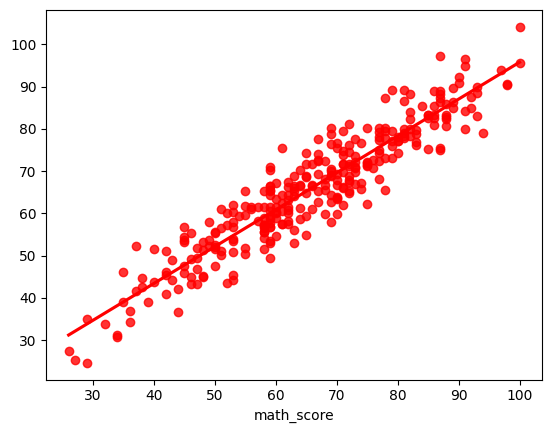

In [36]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [37]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
204,59,49.4375,9.5625
71,63,64.0625,-1.0625
594,92,84.9375,7.0625
672,69,68.8750,0.1250
14,50,47.5625,2.4375
...,...,...,...
750,71,71.8125,-0.8125
876,81,89.3125,-8.3125
426,86,89.0000,-3.0000
723,50,51.5000,-1.5000
